In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adagrad
from keras.optimizers import Adam
import numpy as np
from PIL import Image
import os
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense

# 学習用のデータを作る.
image_list = []
label_list = []

# ./data/train 以下のorange,appleディレクトリ以下の画像を読み込む。
for dir in os.listdir("data/train"):
    if dir == ".DS_Store":
        continue

    dir1 = "data/train/" + dir 
    label = 0

    if dir == "A":    # doraはラベル0
        label = 0
    elif dir == "B": # pikaはラベル1
        label = 1

    elif dir == "C": # shinはラベル2
        label = 2


    elif dir == "D": # pikaはラベル1
        label = 3

    elif dir == "E": # shinはラベル2
        label = 4
        
    elif dir == "F": # shinはラベル2
        label = 5


    elif dir == "G": # pikaはラベル1
        label = 6

    elif dir == "H": # shinはラベル2
        label = 7
        
    elif dir == "I": # pikaはラベル1
        label = 8

    elif dir == "J": # shinはラベル2
        label = 9


    elif dir == "K": # pikaはラベル1
        label = 10


    elif dir == "L": # shinはラベル2
        label = 11
        
    elif dir == "M": # shinはラベル2
        label = 12


    elif dir == "N": # pikaはラベル1
        label = 13

    elif dir == "O": # shinはラベル2
        label = 14        
    
    elif dir == "P": # pikaはラベル1
        label = 15

    elif dir == "Q": # shinはラベル2
        label = 16


    elif dir == "R": # pikaはラベル1
        label = 17

    elif dir == "S": # shinはラベル2
        label = 18
        
    elif dir == "T": # shinはラベル2
        label = 19


    elif dir == "U": # pikaはラベル1
        label = 20

    elif dir == "V": # shinはラベル2
        label = 21       
        
    elif dir == "W": # shinはラベル2
        label = 22
        
    elif dir == "X": # shinはラベル2
        label = 23


    elif dir == "Y": # pikaはラベル1
        label = 24

    elif dir == "Z": # shinはラベル2
        label = 25       
        
                
        
                
        
        
    for file in os.listdir(dir1):
        if file != ".DS_Store":
            # 配列label_listに正解ラベルを追加(どら:0 ぴか:1しん2)
            label_list.append(label)
            filepath = dir1 + "/" + file
            # 画像を28x28pixelに変換し、1要素が[R,G,B]3要素を含む配列の28x28の２次元配列として読み込む。
            # [R,G,B]はそれぞれが0-255の配列。
            image = np.array(Image.open(filepath).resize((28, 28)))
            image.shape
        
        
            # 出来上がった配列をimage_listに追加。
            image_list.append(image / 255.)

# kerasに渡すためにnumpy配列に変換。
image_list = np.array(image_list)

# ラベルの配列を1と0からなるラベル配列に変更
# 0 -> [1,0], 1 -> [0,1] という感じ。
Y = to_categorical(label_list)

# モデルを生成してニューラルネットを構築

Using TensorFlow backend.


In [2]:
from keras.models import model_from_json
model = model_from_json(open('lenet_AE.json').read())

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        1520      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
__________

In [4]:
# オプティマイザにAdamを使用
opt = Adam(lr=0.001)
# モデルをコンパイル
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

model.load_weights('lenet_AE_weights.h5')

In [5]:
class_names = np.array(["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z",])

In [6]:
import cv2

img = cv2.imread('data/test/A/A0.png')  # 画像を読み込む。
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR -> RGB

def predict_single_img(img):
    x = np.expand_dims(img, axis=0)  # バッチの次元を追加する
    print(x.shape)
    
predict_single_img(img)

(1, 28, 28, 3)


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

A: 100.00%
Y: 0.00%
B: 0.00%



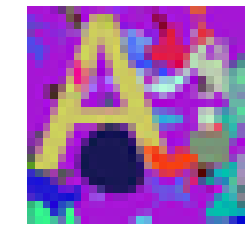

In [8]:
def predict_single_img(img):
    x = np.expand_dims(img, axis=0)  # バッチの次元を追加する。

    # 推論する。
    scores = model.predict(x)[0]
    top3_classes = scores.argsort()[-3:][::-1]

    # 推論結果を表示する。
    for name, score in zip(class_names[top3_classes], scores[top3_classes]):
        print('{}: {:.2%}'.format(name, score))
    print()

img = cv2.imread('data/test/A/A0.png')  # 画像を読み込む。
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR -> RGB
img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_CUBIC) # リサイズする。

# 推論する。
predict_single_img(img)

# 画像を描画する。
plt.axis('off')
plt.imshow(img)
plt.show()

In [13]:
graph = tf.get_default_graph()

In [15]:
tf.get_default_graph().as_graph_def().node

[name: "conv2d_1_input"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: -1
      }
      dim {
        size: 28
      }
      dim {
        size: 28
      }
      dim {
        size: 3
      }
    }
  }
}
, name: "conv2d_1/random_uniform/shape"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_INT32
      tensor_shape {
        dim {
          size: 4
        }
      }
      tensor_content: "\005\000\000\000\005\000\000\000\003\000\000\000\024\000\000\000"
    }
  }
}
, name: "conv2d_1/random_uniform/min"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_FLOAT
      tensor_shape {
      }
      float_val: -0.10215078294277191
    }
  }
}
, name: "conv2d_1/random_uniform/max"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_FL

In [16]:
sess = tf.keras.backend.get_session()

# Adversarial Examples 用のモデルを作成する。
target_class_input = tf.placeholder(dtype=tf.int32)
logits = sess.graph.get_tensor_by_name('dense_2/BiasAdd:0')  # Softmax の直前

loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
    logits=logits, labels=[target_class_input])

gradient = tf.gradients(loss, model.input)

In [17]:
def find_adversary_noise(img, target_class,
                         noise_limit=3., required_score=0.99, max_iterations=100):
    noise = 0  # ノイズの初期値は0にする。

    # 画像の予測ラベル
    x = np.expand_dims(img, axis=0)
    src_class = model.predict(x).argmax()

    for i in range(max_iterations):
        # 画像にノイズを加える。
        noisy_img = img + noise

        # 画素値を [0, 255] に収まるようにクリップする。
        noisy_img = np.clip(noisy_img, a_min=0, a_max=255)

        # 予測値及び勾配を計算する。
        x = np.expand_dims(img, axis=0)
        pred, grad = sess.run([model.output, gradient],
                               feed_dict={model.input: x, target_class_input: target_class})
        pred = np.squeeze(pred)  # (1, NumClasses) -> (NumClasses,)
        grad = np.squeeze(grad)  # (1, 1, Height, Width, 3) -> (Height, Width, 3)

        # ステップ数を計算する。
        grad_absmax = np.abs(grad).max()
        if grad_absmax < 1e-10:
            grad_absmax = 1e-10
        step_size = 7 / grad_absmax

        src_score = pred[src_class]  # 元の予測ラベルの確率
        target_score = pred[target_class]  # ターゲットのラベルの確率

        # 情報を表示する。
        print('[source] {} {:.2%} [target] {} {:.2%}'.format(
            class_names[src_class], src_score, class_names[target_class], target_score))
        print('[Gradient] min: {:.4f}, max: {:.4f}, stepsize: {:.4f}\n'.format(
            grad.min(), grad.max(), step_size))

        if target_score >= required_score:
            break

        # ノイズを更新する。
        noise -= step_size * grad
        # ノイズを [-noise_limit, noise_limit] に収まるようにクリップする。
        noise = np.clip(a=noise, a_min=-noise_limit, a_max=noise_limit)

    return noise

In [21]:
target_class = 10
noise = find_adversary_noise(img, target_class)

FailedPreconditionError: Attempting to use uninitialized value conv2d_1/bias
	 [[{{node conv2d_1/bias/read}} = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](conv2d_1/bias)]]

Caused by op 'conv2d_1/bias/read', defined at:
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\asyncio\base_events.py", line 1434, in _run_once
    handle._run()
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\ipykernel\kernelbase.py", line 346, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\ipykernel\kernelbase.py", line 259, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\ipykernel\kernelbase.py", line 513, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\IPython\core\interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\IPython\core\interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\IPython\core\interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\IPython\core\interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\IPython\core\interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-8e0f2bd9768c>", line 2, in <module>
    model = model_from_json(open('lenet_AE.json').read())
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\keras\engine\saving.py", line 492, in model_from_json
    return deserialize(config, custom_objects=custom_objects)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\keras\layers\__init__.py", line 55, in deserialize
    printable_module_name='layer')
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\keras\utils\generic_utils.py", line 145, in deserialize_keras_object
    list(custom_objects.items())))
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\keras\engine\sequential.py", line 301, in from_config
    model.add(layer)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\keras\engine\sequential.py", line 165, in add
    layer(x)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\keras\engine\base_layer.py", line 431, in __call__
    self.build(unpack_singleton(input_shapes))
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\keras\layers\convolutional.py", line 147, in build
    constraint=self.bias_constraint)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\keras\engine\base_layer.py", line 252, in add_weight
    constraint=constraint)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\keras\backend\tensorflow_backend.py", line 402, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\ops\variables.py", line 145, in __call__
    return cls._variable_call(*args, **kwargs)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\ops\variables.py", line 141, in _variable_call
    aggregation=aggregation)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\ops\variables.py", line 120, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2441, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\ops\variables.py", line 147, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\ops\variables.py", line 1104, in __init__
    constraint=constraint)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\ops\variables.py", line 1266, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\ops\array_ops.py", line 81, in identity
    return gen_array_ops.identity(input, name=name)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 3993, in identity
    "Identity", input=input, name=name)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\framework\ops.py", line 3272, in create_op
    op_def=op_def)
  File "C:\Users\zawa\Miniconda3\envs\mykeras\lib\site-packages\tensorflow\python\framework\ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value conv2d_1/bias
	 [[{{node conv2d_1/bias/read}} = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](conv2d_1/bias)]]
